In [5]:
import numpy as np
import loompy
import matplotlib.pyplot as plt
import logging

(36601, 20571)
['', 'ambiguous', 'spliced', 'unspliced']


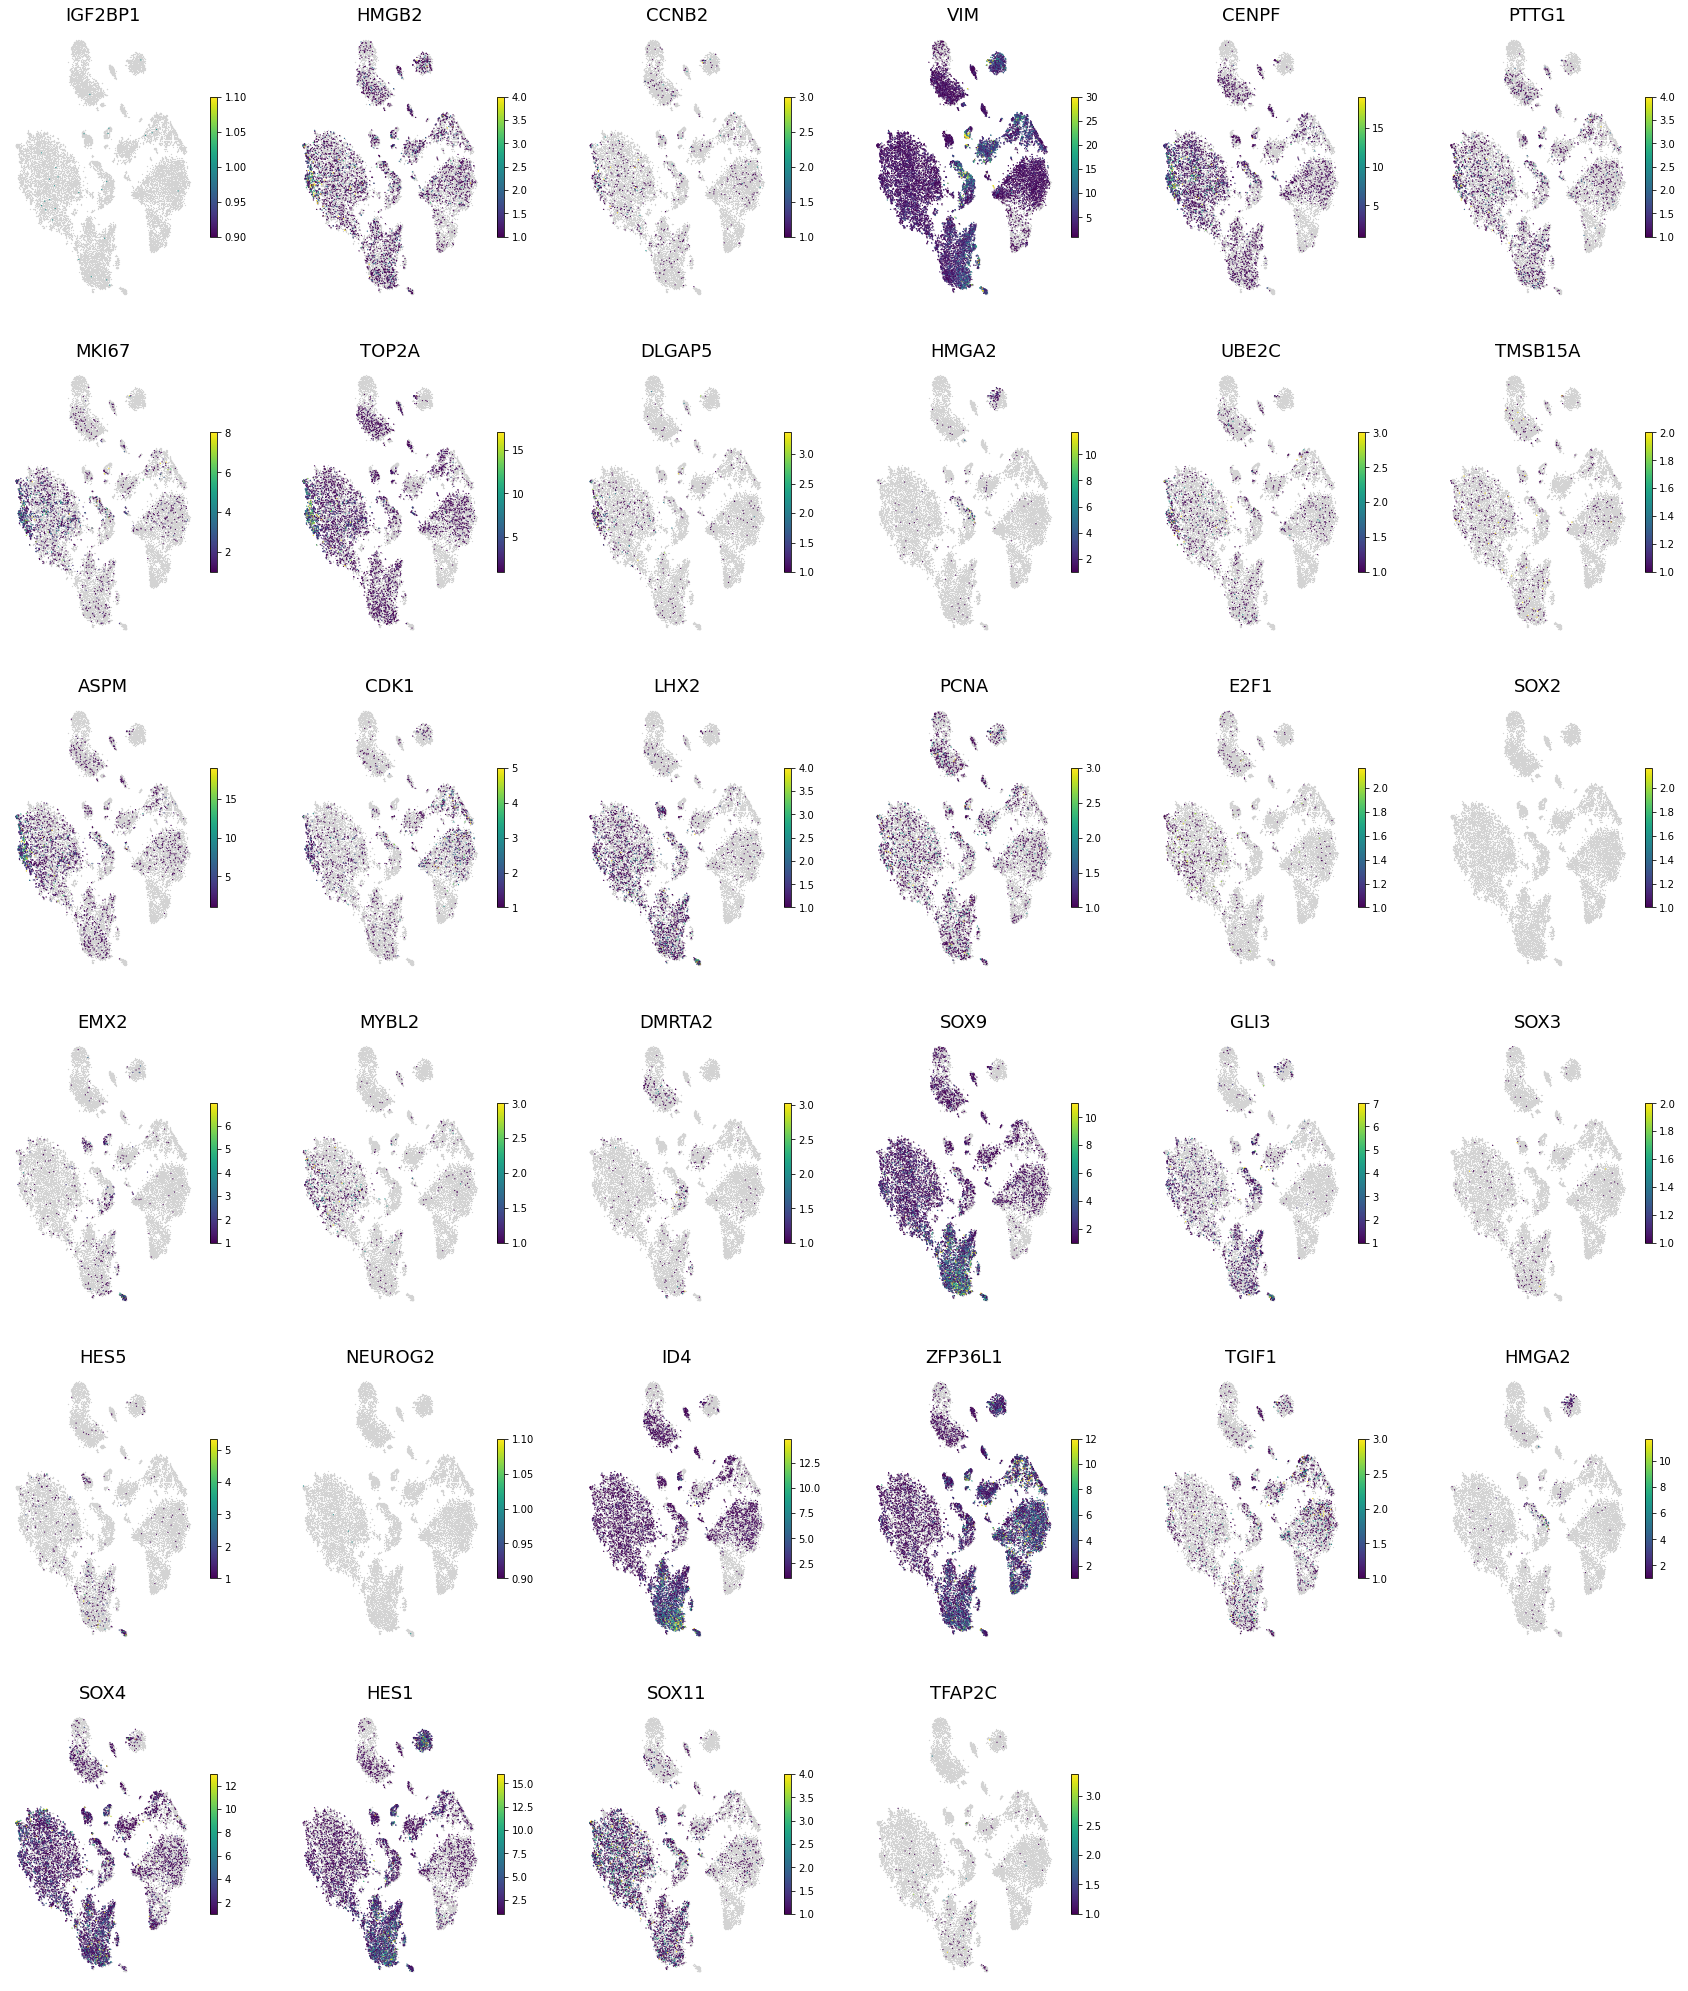

In [41]:
genes = ['IGF2BP1', 'HMGB2', 'CCNB2', 'VIM', 'CENPF', 'PTTG1', 'MKI67', 'TOP2A', 
         'DLGAP5', 'HMGA2', 'UBE2C', 'TMSB15A', 'ASPM', 'CDK1', 'LHX2', 'PCNA', 'E2F1',
         'SOX2', 'EMX2', 'MYBL2', 'DMRTA2', 'SOX9', 'GLI3', 'SOX3', 'HES5', 'NEUROG2',
         'ID4', 'ZFP36L1', 'TGIF1', 'HMGA2', 'SOX4', 'HES1', 'SOX11', 'TFAP2C']
         
nrows = int(np.ceil(len(genes)/6))
fig, ax = plt.subplots(nrows,6, figsize=(30,(nrows*6)))
ax = ax.flatten()

f_RNA = '/proj/DEV_ATAC/GBM_20211116/SL040/SL040_RNA.loom'
f_agg = '/proj/DEV_ATAC/GBM_20211116/SL040/SL040_RNA.agg.loom'
emb = 'TSNE'
with loompy.connect(f_RNA, 'r') as ds:
    print(ds.shape)
    print(ds.layers.keys())
    for i, gene in enumerate(genes):
        ## Inferred
        v = ds.layer[''][ds.ra.Gene == gene,:].flatten()
        x = np.where(v > 0)[0]
        ax[i].scatter(ds.ca[emb][:,0], ds.ca[emb][:,1], c='lightgray', marker='.', lw=0, s=6)
        ax[i].set_title(gene, fontsize=18)
        if len(x) > 0:
            im = ax[i].scatter(ds.ca[emb][x,0], ds.ca[emb][x,1], c=v[x], cmap='viridis', vmax = np.quantile(v[x], .99), marker='.', lw=0, s=6)
        fig.colorbar(im, ax=ax[i], orientation='vertical', shrink=.5)
        ax[i].axis('off')
        
    logging.info(f'turning off visibility on remaining axes')
    while i < ax.shape[0]:
        ax[i].axis('off')
        i += 1
        

['', 'enrichment', 'trinaries']
(36601, 27)
['ZFP36L1' 'VIM' 'ID4' 'SOX9' 'HES1' 'GLI3' 'LHX2' 'HES5' 'EMX2']
['ZFP36L1' 'TGIF1' 'VIM' 'PCNA' 'ID4' 'SOX9' 'HES1' 'GLI3' 'LHX2' 'TFAP2C'
 'HES5' 'EMX2' 'NEUROG2']


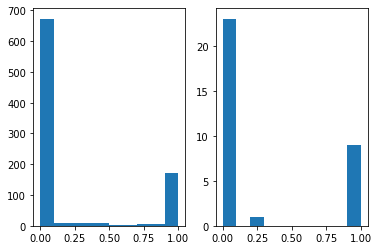

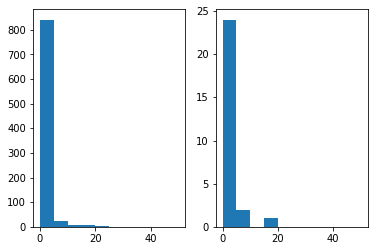

In [39]:
with loompy.connect(f_agg, 'r') as dsagg:
    print(dsagg.layers.keys())
    print(dsagg.shape)
    x = np.isin(dsagg.ra.Gene, genes)
    trns = dsagg['trinaries'][x,:]
    
    fig, ax = plt.subplots(1,2)
    ax[0].hist(trns.flatten())
    
    ax[1].hist(trns[:,26])
    exp = trns[:,26] > .5
    print(dsagg.ra.Gene[x][exp])
    
    enr = dsagg['enrichment'][x,:]
    
    fig, ax = plt.subplots(1,2)
    ax[0].hist(enr.flatten(), range=(0,50))
    
    x = np.isin(dsagg.ra.Gene, genes)
    ax[1].hist(enr[26], range=(0,50))
    exp = enr[:,26] > 1
    print(dsagg.ra.Gene[x][exp])    

['', 'enrichment', 'trinaries']
(36601, 27)


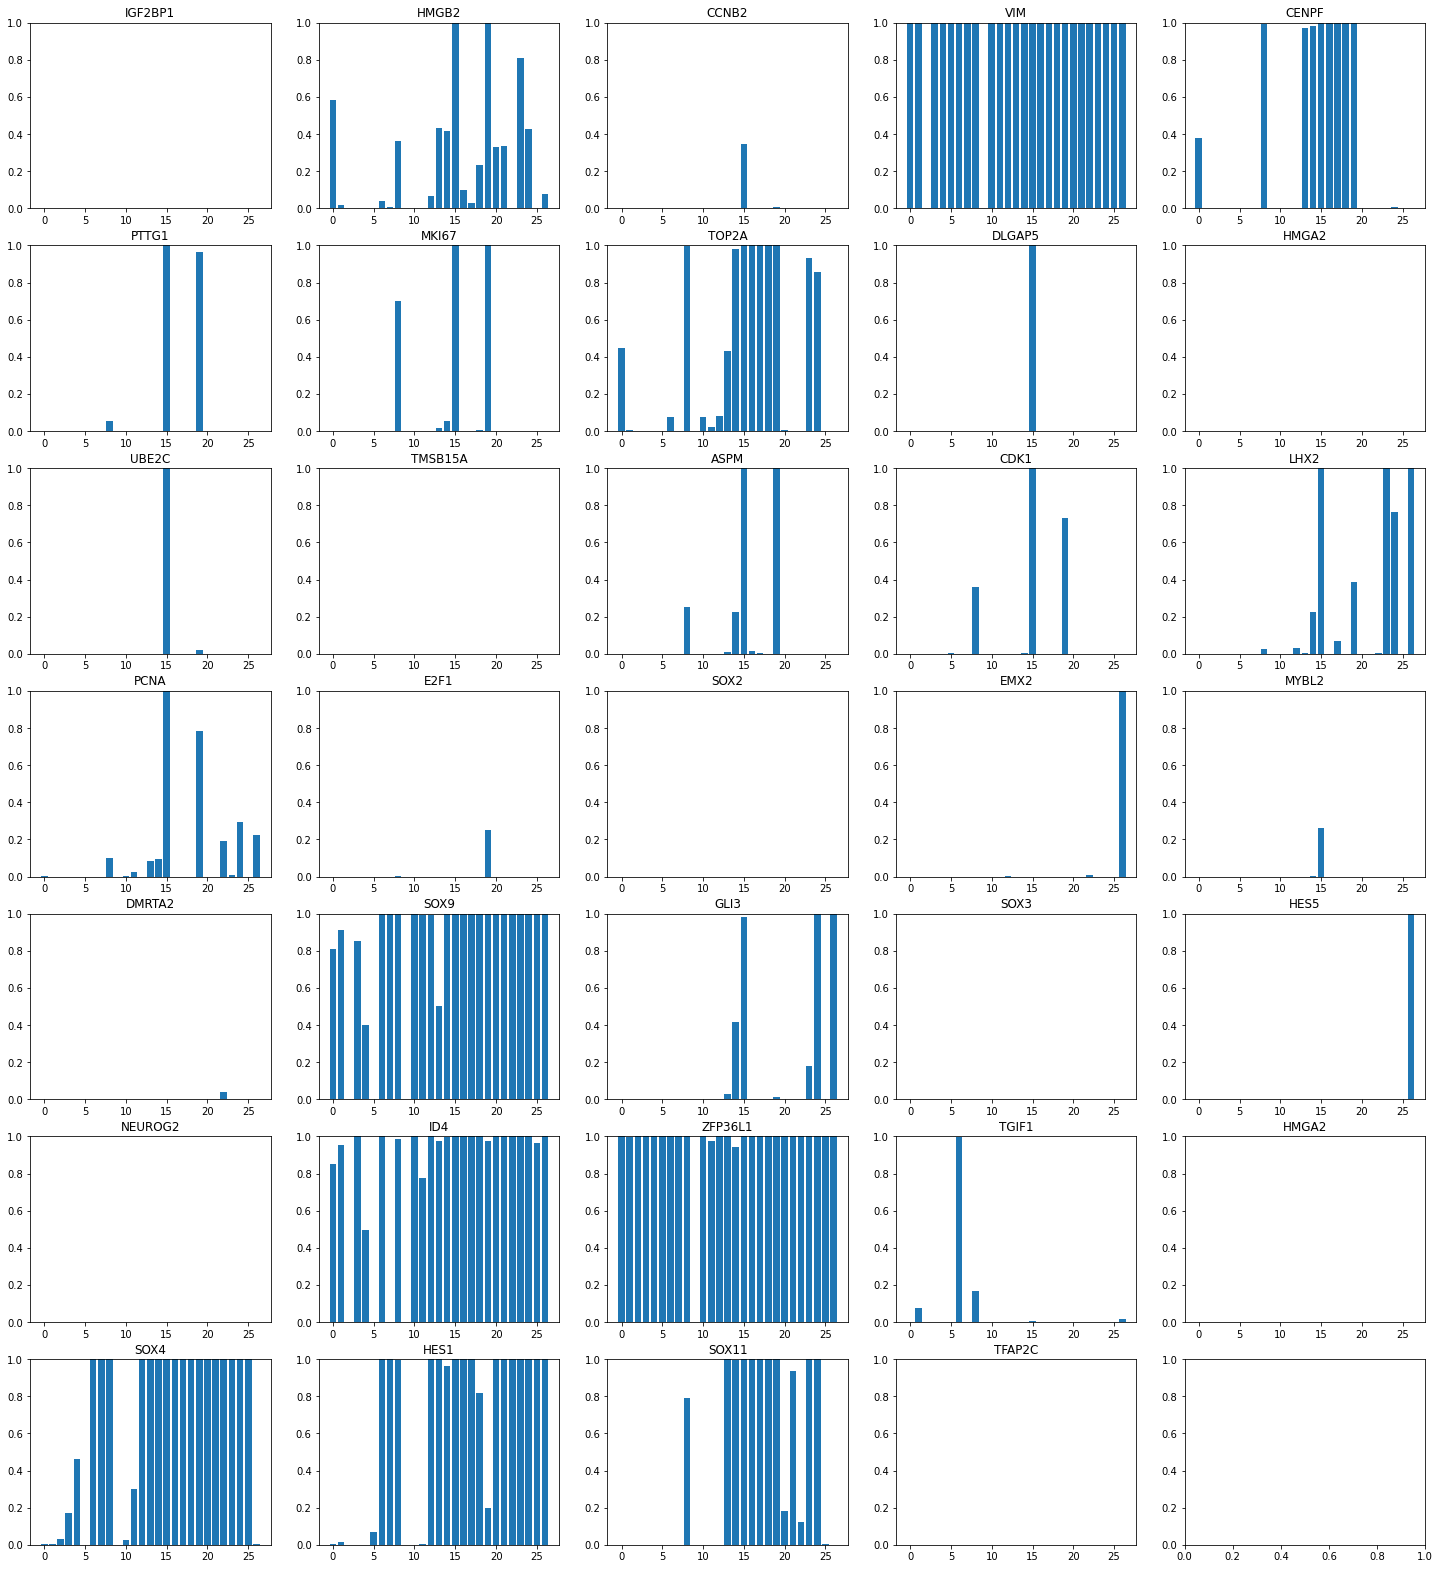

In [51]:
with loompy.connect(f_agg, 'r') as dsagg:
    print(dsagg.layers.keys())
    print(dsagg.shape)

    nrows = int(np.ceil(len(genes)/5))
    fig, ax = plt.subplots(nrows,5, figsize=(25,(nrows*4)))
    ax = ax.flatten()
    
    for i, gene in enumerate(genes):
        X = dsagg['trinaries'][np.where(dsagg.ra.Gene==gene)[0],:].flatten()
        ax[i].bar(np.arange(dsagg.shape[1]), X)
        ax[i].set_ylim([0,1])
        ax[i].set_title(gene)